In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from pylab import rcParams
import seaborn as sns


In [2]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

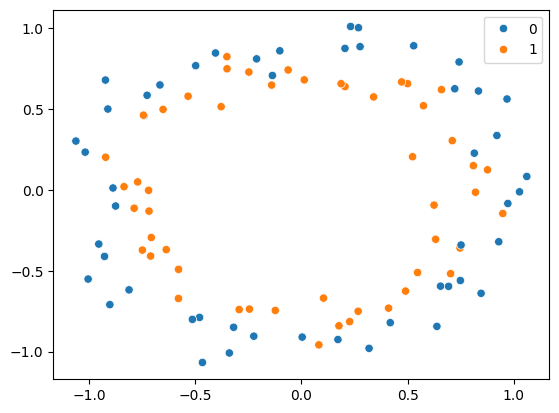

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
model0=Sequential()
adam=Adam(learning_rate=0.01)

model0.add(Dense(256,input_dim=2,activation='relu'))
model0.add(Dense(1,activation='sigmoid'))

model0.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history0=model0.fit(X_train,y_train,epochs=1500,verbose=0,validation_data=(X_test,y_test))

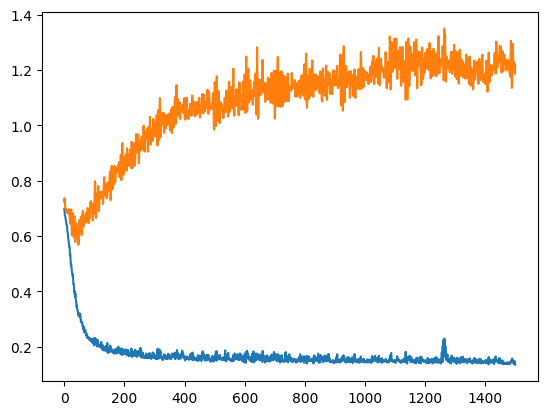

In [7]:
plt.plot(history0.history['loss'],label='train')
plt.plot(history0.history['val_loss'],label='test')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


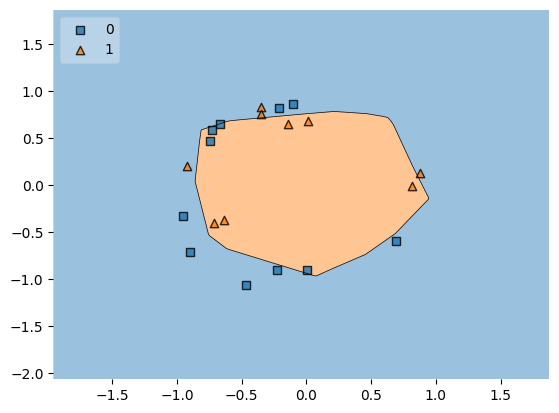

In [8]:
plot_decision_regions(X_test, y_test, clf = model0, legend=2)
plt.show()

EARLY STOPPING

In [9]:
model=Sequential()
adam=Adam(learning_rate=0.01)

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [14]:
early_stop=EarlyStopping(monitor='val_loss',
              min_delta=0.00001,
              patience=20,
              verbose=1,
              mode="auto",
              baseline=None,
              restore_best_weights=False
              )

In [16]:
history=model.fit(X_train,y_train,epochs=1500,verbose=1,callbacks=early_stop,validation_data=(X_test,y_test))

Epoch 1/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9172 - loss: 0.2228 - val_accuracy: 0.6500 - val_loss: 0.7227
Epoch 2/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9391 - loss: 0.2108 - val_accuracy: 0.6500 - val_loss: 0.7454
Epoch 3/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8977 - loss: 0.2390 - val_accuracy: 0.6500 - val_loss: 0.7238
Epoch 4/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9234 - loss: 0.2255 - val_accuracy: 0.7000 - val_loss: 0.6921
Epoch 5/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9234 - loss: 0.2316 - val_accuracy: 0.6000 - val_loss: 0.7013
Epoch 6/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9352 - loss: 0.2205 - val_accuracy: 0.6500 - val_loss: 0.6949
Epoch 7/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9133 - loss: 0.2158 - val_accuracy: 0.6500 - val_loss: 0.6987
Epoch 8/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9273 - loss: 0.2323 - val_accuracy: 0.6500 - v

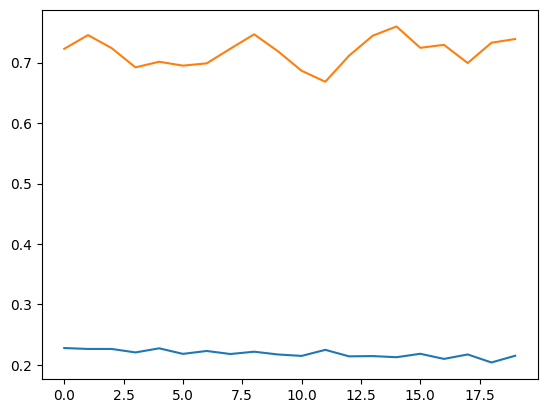

In [17]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


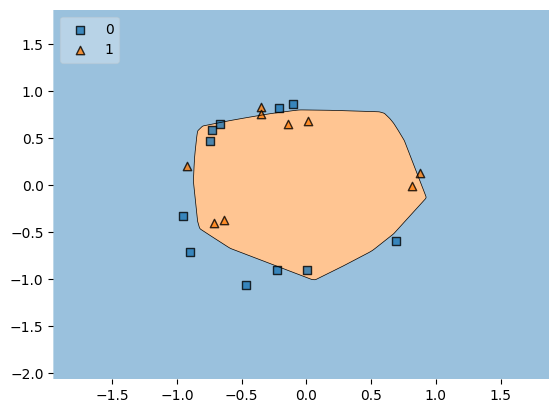

In [19]:
plot_decision_regions(X_test, y_test, clf = model, legend=2)
plt.show()